In [19]:
import pandas as pd

df = pd.read_csv('data/wines_SPA.csv')

print(df.head())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [20]:
len(df)

7500

In [21]:
print(df.shape)
print(df.describe())

(7500, 11)
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000


In [22]:
df_sorted = df.sort_values(by=df.columns.tolist())

print(df_sorted[df_sorted.duplicated(keep=False)])

                  winery        wine  year  rating  num_reviews country  \
2042              Artadi  Valdegines  2016     4.2          398  Espana   
2067              Artadi  Valdegines  2016     4.2          398  Espana   
2092              Artadi  Valdegines  2016     4.2          398  Espana   
2117              Artadi  Valdegines  2016     4.2          398  Espana   
2142              Artadi  Valdegines  2016     4.2          398  Espana   
...                  ...         ...   ...     ...          ...     ...   
5124  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5524  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5574  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5874  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   
5999  Vinedos de Paganos  El Puntido  2005     4.2          384  Espana   

              region  price         type  body  acidity  
2042  Vino de Espana  48.96  Tempranillo 

In [23]:
df = df.drop_duplicates()
print(df.shape)


(2048, 11)


In [24]:
df.isnull().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

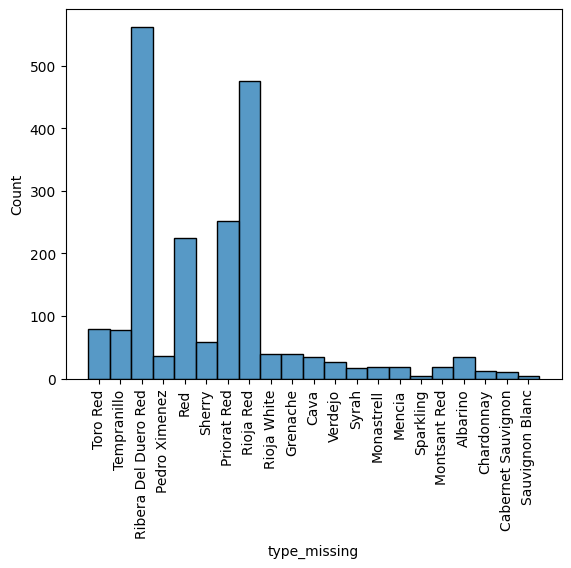

In [57]:
# checking the imputability by looking at the distribution

import matplotlib.pyplot as plt
import seaborn as sns
df['type_missing'] = df['type'].fillna('Missing')
df['body_missing'] = df['body'].fillna('Missing')
df['acidity_missing'] = df['acidity'].fillna('Missing')
sns.histplot(df['type_missing'])
plt.xticks(rotation=90)
plt.show()

In [75]:
print(df.shape)
category_columns = ['winery', 'wine', 'region', 'year', 'type', 'body', 'acidity']

for category_column in category_columns:
    print(f"Value counts for column {category_column}:")
    counts = df[category_column].value_counts()
    print(counts)
    print("")

(2048, 13)
Value counts for column winery:
winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: count, Length: 480, dtype: int64

Value counts for column wine:
wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Sil

OK there are too many categories with only 1 member in winery (480 categories), wine (847), year (70), region (76).

We'll create "other" categories, which can also include the NaN

In [80]:
winery_counts = df['winery'].value_counts(dropna=False)
common_values = winery_counts[winery_counts > 10].index

df['df_winery_others'] = df['winery'].where(df['winery'].isin(common_values), 'Other')

counts = df['df_winery_others'].value_counts()
print(counts)

df_winery_others
Other                               1071
Vega Sicilia                          97
Alvaro Palacios                       48
Artadi                                43
La Rioja Alta                         36
Marques de Murrieta                   33
Dominio de Pingus                     31
Martinet                              30
Abadia Retuerta                       27
Vina Sastre                           25
Emilio Moro                           25
Remirez de Ganuza                     24
Toro Albala                           23
Muga                                  23
Bodegas Roda                          23
Contino                               21
Marques de Riscal                     21
Bodega Contador (Benjamin Romeo)      21
Clos Mogador                          20
Sierra Cantabria                      19
Familia Torres                        19
Pago de Los Capellanes                19
Bodegas Mauro                         18
Teso La Monja                         17

In [81]:

# Targeted Encoding

global_mean = df['price'].mean()
agg = df.groupby('winery')['price'].agg(['mean', 'count'])
smoothing = 10
agg['smoothed'] = (agg['mean'] * agg['count'] + global_mean * smoothing) / (agg['count'] + smoothing)
df['winery_encoded'] = df['winery'].map(agg['smoothed'])

counts = df['winery_encoded'].value_counts()
print(counts)

winery_encoded
557.632355    97
521.346240    48
208.019659    43
106.722651    36
180.590975    33
              ..
125.855631     1
123.992904     1
126.601995     1
123.665631     1
124.756540     1
Name: count, Length: 450, dtype: int64


In [84]:
pd.set_option('display.max_rows', 500)
print(df[df['winery'] == 'Vega Sicilia']['price'].mean())

601.1777319587628


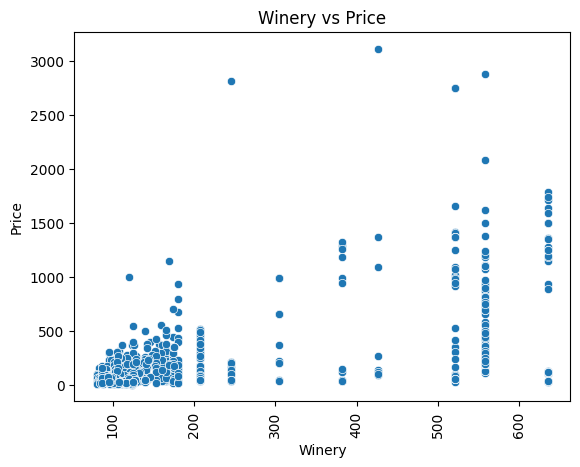

In [86]:
sns.scatterplot(data=df, x='winery_encoded', y='price')
plt.title("Winery vs Price")
plt.xlabel("Winery")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

In [62]:
# checking correlations 

from scipy.stats import chi2_contingency


# Create contingency table
contingency = pd.crosstab(df['region'], df['acidity_missing'])

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency)

print(contingency)
print("Chi-square p-value:", p)

acidity_missing  1.0  2.0  3.0  Missing
region                                 
Abona              0    0    0        1
Alella             0    0    2        2
Alicante           0    0    8        7
Almansa            0    0    7        0
Andalucia          0    0    2        2
...              ...  ...  ...      ...
Valdejalon         0    0    0        1
Valdeorras         0    0    0       10
Valencia           0    0    8        2
Vino de Espana     0   38    4        3
Yecla              0    0    7        1

[76 rows x 4 columns]
Chi-square p-value: 0.0


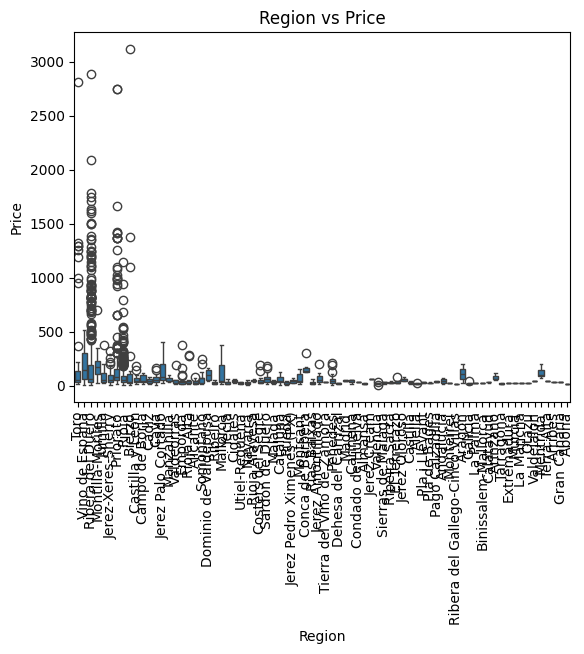

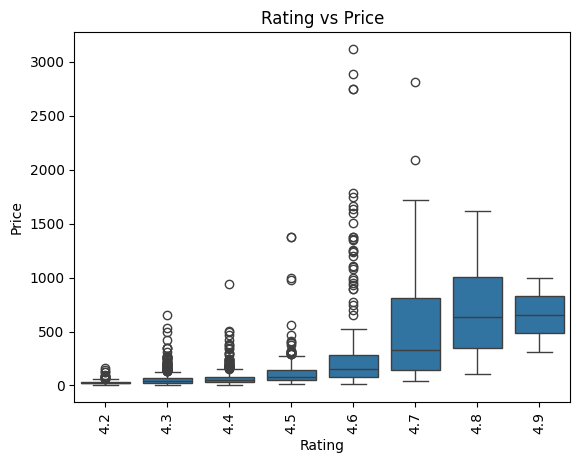

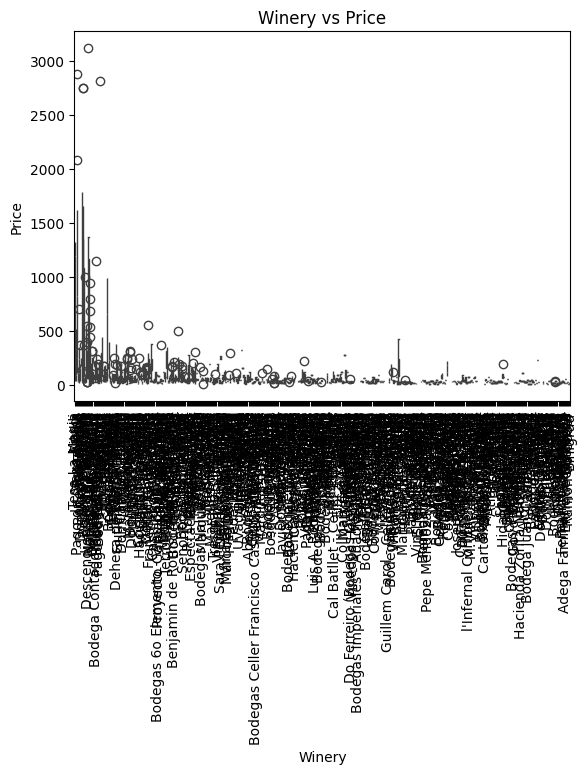

In [71]:
# Check some correlations

sns.boxplot(data=df, x='region', y='price')
plt.title("Region vs Price")
plt.xlabel("Region")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()
sns.boxplot(data=df, x='rating', y='price')
plt.title("Rating vs Price")
plt.xlabel("Rating")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

sns.boxplot(data=df, x='winery', y='price')
plt.title("Winery vs Price")
plt.xlabel("Winery")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

Now lets create buckets for Price ranges



<Axes: xlabel='price', ylabel='Count'>

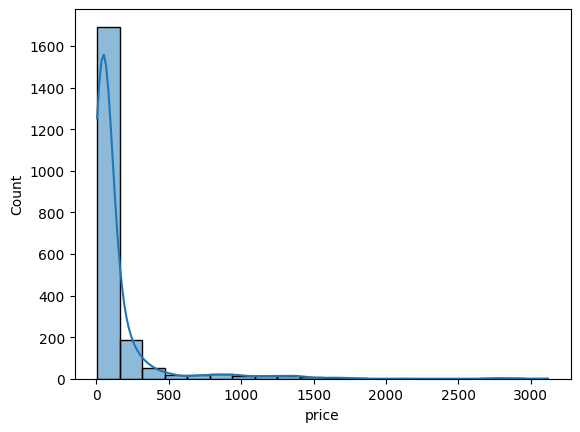

In [67]:
sns.histplot(data=df, x='price', bins=10, kde=True)

<Axes: xlabel='price', ylabel='Count'>

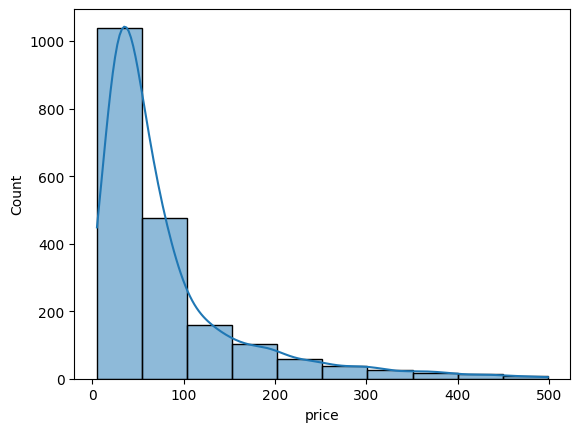

In [68]:
sns.histplot(data=df[df['price'] <= 500], x='price', bins=10, kde=True)

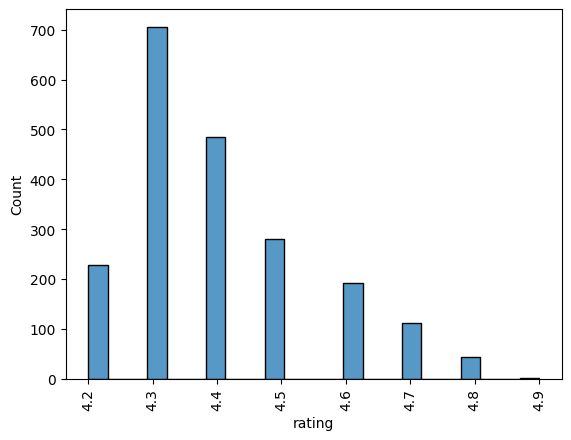

In [46]:
sns.histplot(df['rating'])
plt.xticks(rotation=90)
plt.show()

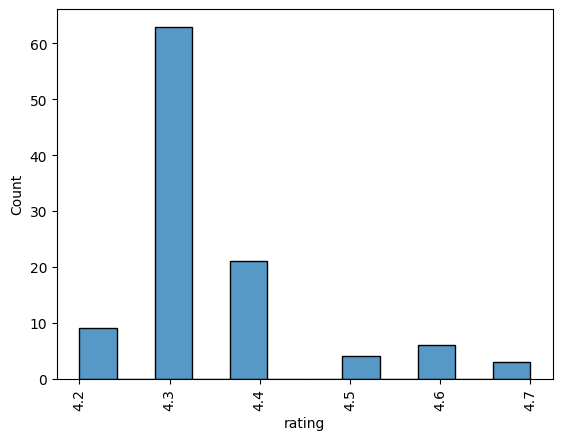

In [45]:
type_missing_subset = df[df['type'].isnull()]
sns.histplot(type_missing_subset['rating'])
plt.xticks(rotation=90)
plt.show()

So the distribution with regards to rating of the entire dataset is very similar like the distribution of the data where type is missing. So I can randomly impute type, as there is a likelyhood there is not much influence of this feature on the reuslt. 

In [47]:
import numpy as np

probs = df['type'].value_counts(normalize=True)

# Randomly assign based on distribution
missing_mask = df['type'].isnull()
df.loc[missing_mask, 'type'] = np.random.choice(probs.index, size=missing_mask.sum(), p=probs.values)

Now let's see the new distribution:


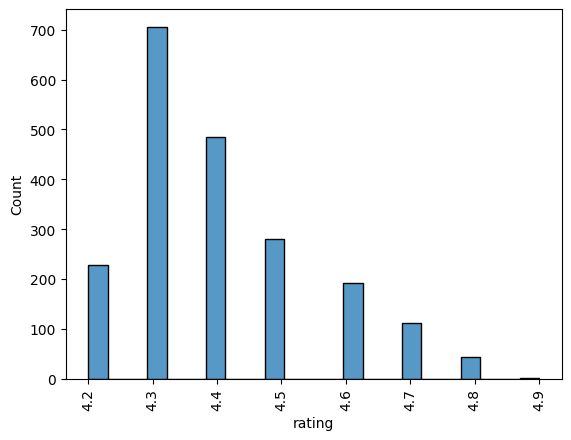

In [48]:
sns.histplot(df['rating'])
plt.xticks(rotation=90)
plt.show()

In [49]:
# checking that the nulls are gone
df.isnull().sum()

winery            0
wine              0
year             72
rating            0
num_reviews       0
region            0
price             0
type              0
body            271
acidity         271
type_missing      0
dtype: int64

Now the same for the other features

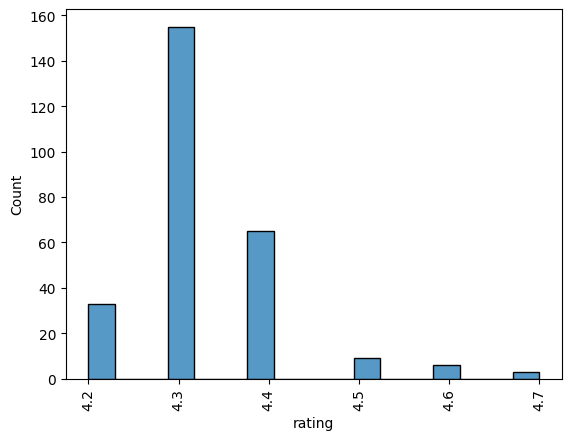

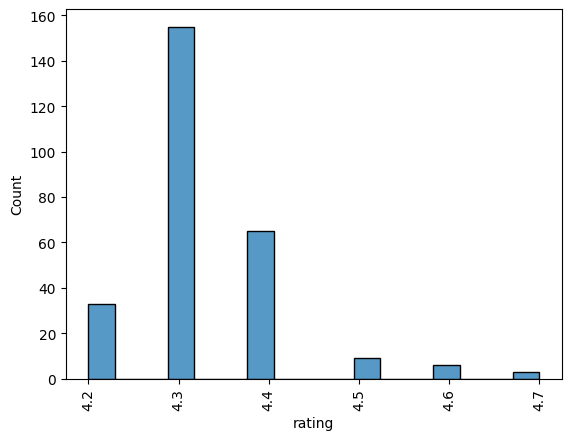

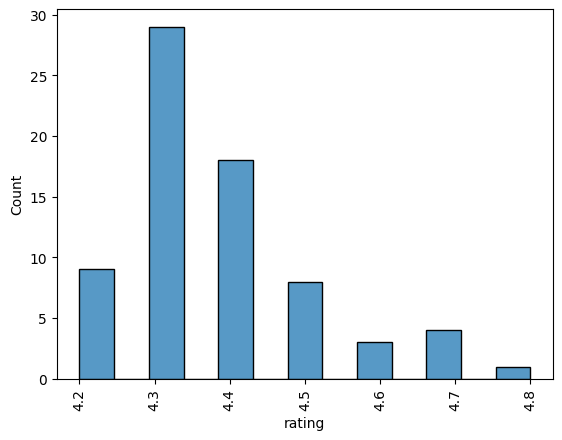

In [52]:
body_missing_subset = df[df['body'].isnull()]
sns.histplot(body_missing_subset['rating'])
plt.xticks(rotation=90)
plt.show()
acidity_missing_subset = df[df['acidity'].isnull()]
sns.histplot(acidity_missing_subset['rating'])
plt.xticks(rotation=90)
plt.show()
year_missing_subset = df[df['year'].isnull()]
sns.histplot(year_missing_subset['rating'])
plt.xticks(rotation=90)
plt.show()

Let's double check that with price

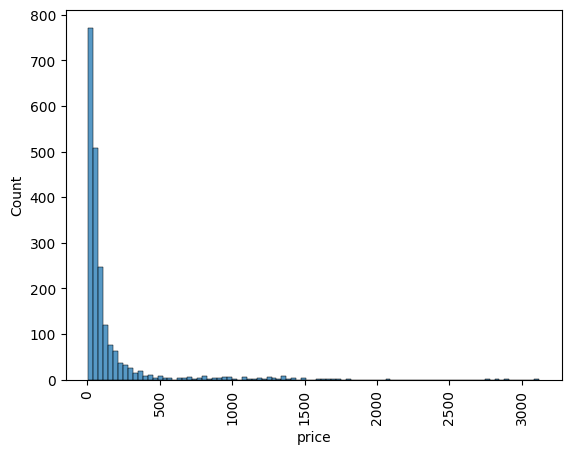

53.625


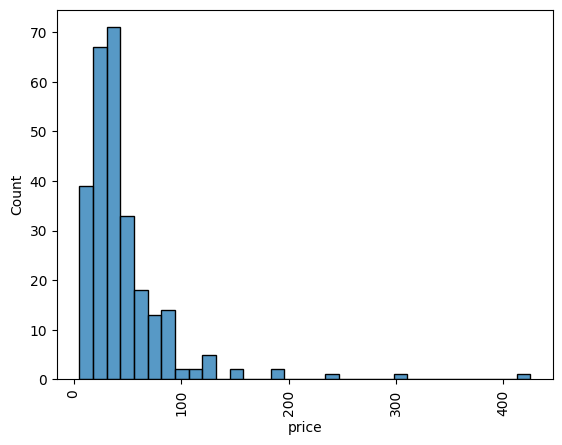

35.1


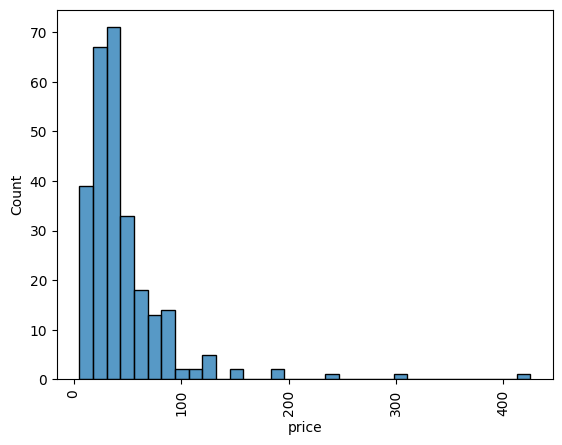

35.1


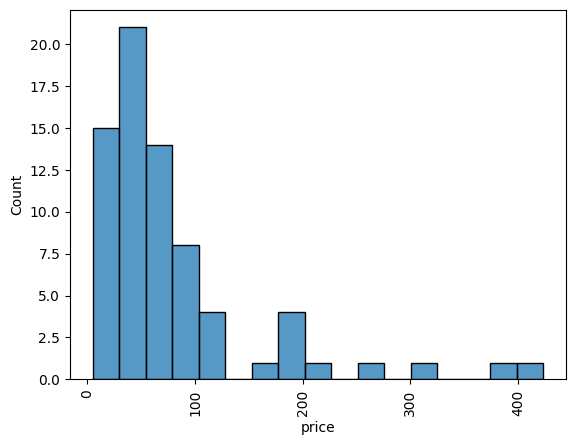

53.95


In [56]:
sns.histplot(df['price'])
plt.xticks(rotation=90)
plt.show()
print(df['price'].median())
body_missing_subset = df[df['body'].isnull()]
sns.histplot(body_missing_subset['price'])
plt.xticks(rotation=90)
plt.show()
print(body_missing_subset['price'].median())
acidity_missing_subset = df[df['acidity'].isnull()]
sns.histplot(acidity_missing_subset['price'])
plt.xticks(rotation=90)
plt.show()
print(acidity_missing_subset['price'].median())
year_missing_subset = df[df['year'].isnull()]
sns.histplot(year_missing_subset['price'])
plt.xticks(rotation=90)
plt.show()
print(year_missing_subset['price'].median())

This shows that Year doesn't have an impact on the prediction, and acidity and body a slight. So I will impute Year with random data, and acidity and body with a "Missing" label. 

In [29]:
df_missing_body = df[df['body'].isnull()]
print(df_missing_body)

                      winery                                wine  year  \
120            Finca Moncloa                    Tintilla de Rota  2016   
147          Rafael Palacios           Sorte O Soro Val do Bibei  2019   
156     Gutierrez de la Vega  Recondita Armonia Monastrell Dulce  1987   
254      Costers del Siurana                      Dolc de L'Obac  2006   
288   Francisco Garcia Perez          Adega do Moucho Treixadura  2017   
...                      ...                                 ...   ...   
2021             Mustiguillo                     Finca Terrerazo  2017   
2022             Matarromera                        Gran Reserva  2011   
2023                Sei Solo                            Preludio  2016   
2024      Vinedos de Paganos                          El Puntido  2005   
6100       Remirez de Ganuza                        Rioja Blanco  2017   

      rating  num_reviews country            region      price  \
120      4.7           92  Espana            

check for year that all values are actually years

In [30]:
print(df['year'].dtype)

object


they are not (object), so I force all non-numerical values to become NaN

In [31]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [32]:
# check again
print(df['year'].dtype)
df.isnull().sum()

float64


winery            0
wine              0
year             72
rating            0
num_reviews       0
country           0
region            0
price             0
type            106
body            271
acidity         271
type_missing      0
dtype: int64

Probably should repeat that for all numerical columns

In [33]:
print(f"Data Type for year: {df['year'].dtype}")
print(f"Data Type for rating: {df['rating'].dtype}")
print(f"Data Type for num_reviews: {df['num_reviews'].dtype}")
print(f"Data Type for price: {df['price'].dtype}")
print(f"Data Type for acidity: {df['acidity'].dtype}")

Data Type for year: float64
Data Type for rating: float64
Data Type for num_reviews: int64
Data Type for price: float64
Data Type for acidity: float64


ok looks good. I can't change year to int64 because of the existing NaNs.

Check the data with reagrds to type, body and acidity
1. is there a relationship between body and acidity missing?
2. what about type and year?

In [34]:
# Boolean mask: both missing
both_missing = df['body'].isna() & df['acidity'].isna()

# Just feature_1 missing
only_f1_missing = df['body'].isna() & df['acidity'].notna()

# Just feature_2 missing
only_f2_missing = df['acidity'].isna() & df['body'].notna()

# Summary
print(f"Both missing: {both_missing.sum()}")
print(f"Only body missing: {only_f1_missing.sum()}")
print(f"Only acidity missing: {only_f2_missing.sum()}")

Both missing: 271
Only body missing: 0
Only acidity missing: 0


In [35]:
# Boolean mask: both missing
both_missing = df['body'].isna() & df['type'].isna()

# Just feature_1 missing
only_f1_missing = df['body'].isna() & df['type'].notna()

# Just feature_2 missing
only_f2_missing = df['type'].isna() & df['body'].notna()

# Summary
print(f"Both missing: {both_missing.sum()}")
print(f"Only body missing: {only_f1_missing.sum()}")
print(f"Only type missing: {only_f2_missing.sum()}")

Both missing: 106
Only body missing: 165
Only type missing: 0


In [36]:
# Boolean mask: both missing
both_missing = df['body'].isna() & df['year'].isna()

# Just feature_1 missing
only_f1_missing = df['body'].isna() & df['year'].notna()

# Just feature_2 missing
only_f2_missing = df['year'].isna() & df['body'].notna()

# Summary
print(f"Both missing: {both_missing.sum()}")
print(f"Only body missing: {only_f1_missing.sum()}")
print(f"Only year missing: {only_f2_missing.sum()}")

Both missing: 9
Only body missing: 262
Only year missing: 63


No overlap with year. Missing years have a different reason. 

Now, it could be that there are more duplicates, if the only reason is a missing value.
I check for duplicates across all columns except the ones with missing values year, type, body, acidity)

In [37]:
# all features: 'winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region', 'price', 'type', 'body', 'acidity'
df_sorted = df.sort_values(by=df.columns.tolist())
possible_duplicates = df_sorted[df_sorted.duplicated(subset=['winery', 'wine', 'rating', 'num_reviews', 'country', 'region', 'price'], keep=False)]
print(len(possible_duplicates))
print(possible_duplicates)

48
                    winery                                wine    year  \
2042                Artadi                          Valdegines  2016.0   
2017                Artadi                          Valdegines  2016.0   
2033      Bodegas La Horra                           Corimbo I  2015.0   
2008      Bodegas La Horra                           Corimbo I  2015.0   
2035              Campillo                  Gran Reserva Rioja  2012.0   
2010              Campillo                  Gran Reserva Rioja  2012.0   
2027             Clos Pons                              Roc Nu  2011.0   
2002             Clos Pons                              Roc Nu  2011.0   
2045  Conreria d'Scala Dei                       Les Brugueres  2018.0   
2020  Conreria d'Scala Dei                       Les Brugueres  2018.0   
2044               Contino                             Reserva  2016.0   
2019               Contino                             Reserva  2016.0   
2043               Contino         

We know now that there are 3 sets of data:
- all data exist (majority)
- body and acidity missing (624)
- body, acidity and type missing (545)

In [38]:


# Check the number of categories for categorical data
print(f"Number of unique wineries: {df['winery'].nunique()}")
print(f"Number of unique wines: {df['wine'].nunique()}")
print(f"Number of unique years: {df['year'].nunique()}")
print(f"Number of unique countries: {df['country'].nunique()}")
print(f"Number of unique regions: {df['region'].nunique()}")
print(f"Number of unique types: {df['type'].nunique()}")


Number of unique wineries: 480
Number of unique wines: 847
Number of unique years: 70
Number of unique countries: 1
Number of unique regions: 76
Number of unique types: 21


I can drop the country feature, because all wines are from Spain, so there no information in this.


In [39]:
df = df.drop('country', axis=1)

I want to check if wineries is a subcategory of region

In [40]:
regions_per_winery = df.groupby('winery')['region'].nunique()
print(f"There are {len(regions_per_winery[regions_per_winery > 1])} wineries with more than one region")
print(regions_per_winery[regions_per_winery > 1])
df[df['winery'] == 'Romate']


There are 52 wineries with more than one region
winery
Abadia Retuerta                              2
Altanza                                      3
Alvaro Domecq                                2
Alvaro Palacios                              2
Artadi                                       2
Atlan & Artisan                              2
Bodega Campo Eliseo                          2
Bodega Otazu                                 2
Bodegas 6o Elemento - Vino Sexto Elemento    2
Bodegas Amaren                               2
Bodegas Aragonesas                           2
Bodegas Frontonio                            2
Bodegas Mauro                                2
Bodegas San Roman                            2
Bodegas Tradicion                            5
Bodegas Valduero                             2
Bodegas Ximenez-Spinola                      2
Bosque de Matasnos                           2
Carlos Moro                                  2
Casa Rojo                                    2
Clos 

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,type_missing
547,Romate,Cayetano del Pino Viejisimo Palo Cortado,NaN,4.5,61,Jerez Palo Cortado,25.92,Sherry,4.0,3.0,Sherry
964,Romate,Old & Plus Pedro Ximenez,NaN,4.4,64,Jerez Pedro Ximenes (PX),42.12,Sherry,4.0,3.0,Sherry
1091,Romate,Old & Plus Amontillado,NaN,4.4,28,Jerez Amontillado,15.84,Sherry,4.0,3.0,Sherry
1792,Romate,Old & Plus Oloroso,NaN,4.3,28,Jerez Oloroso,45.00,Sherry,4.0,3.0,Sherry


Realising that the year can also be "n.v." which probably means not available. how many?

In [41]:
len(df[df['year'] == 'N.V.'])

0

In [42]:
years = df.groupby('year').nunique()
print(years)

        winery  wine  rating  num_reviews  region  price  type  body  acidity  \
year                                                                            
1910.0       1     1       1            1       1      1     1     1        1   
1922.0       1     1       1            1       1      1     1     1        1   
1925.0       1     1       1            1       1      1     1     1        1   
1928.0       1     1       1            1       1      1     1     1        1   
1929.0       1     1       1            1       1      1     1     1        1   
...        ...   ...     ...          ...     ...    ...   ...   ...      ...   
2017.0     168   221       7          171      50    204    17     4        3   
2018.0     145   177       8          138      41    172    16     3        3   
2019.0      86   104       7           89      35    105    18     4        3   
2020.0      34    35       6           29      17     33     9     3        1   
2021.0       6     6       3

In [43]:
df_sorted = df.sort_values(by=df.columns.tolist())

print(df_sorted[df_sorted.duplicated(keep=False)])

Empty DataFrame
Columns: [winery, wine, year, rating, num_reviews, region, price, type, body, acidity, type_missing]
Index: []
